# Exploring data through visualization in Jupyter


We will use data from Finnish Meteorological institute, which is already provided. 

> If you want to get your own dataset to play around with, you can choose the dataset and download a csv (comma separated value) file from : <https://en.ilmatieteenlaitos.fi/download-observations>. 
> For this Notebook to work, please make sure to download data from one date only and put it in the same place where `Tapiola_25Oct25.csv` is located. 

The datasets provided for this demo/exercise are from Vihti and Espoo in Finland of 25.10.2025. 

This notebook uses Python to explore one csv file at a time. It is an example of **data exploration** when you take your first look at a dataset. 

## Let's use some Python code to create a plot of the temperature and rainfall 

First, we need to get some tools to explore the data, in Python this is done using the `import` functionality. We will use `pandas` for handling the table, and `pyplot`, which is includes in `matplotlib` as visualization tool. 

In [1]:
import pandas 
import matplotlib.pyplot  as pyplot

Then we need to specify which file we want to read, and read it into memory as a `dataframe` (we call it df) with `pandas`. 

In [2]:
csv_file = "Tapiola_25Oct25.csv"  # Replace with your file name

# read the csv file into memory
df = pandas.read_csv(csv_file)

We now can explore what data was in the csv file, by looking at the columns or also look at the full table. 

In [3]:
df.columns

Index(['Observation station', 'Year', 'Month', 'Day', 'Time [Local time]',
       'Minimum temperature [°C]', 'Precipitation [mm]'],
      dtype='object')

In [4]:
df

,Observation station,Year,Month,Day,Time [Local time],Minimum temperature [°C],Precipitation [mm]
0,Espoo Tapiola,2025,10,25,00:00,9.5,0.0
1,Espoo Tapiola,2025,10,25,01:00,9.5,0.3
2,Espoo Tapiola,2025,10,25,02:00,9.5,1.2
3,Espoo Tapiola,2025,10,25,03:00,9.6,0.6
4,Espoo Tapiola,2025,10,25,04:00,9.8,0.6
5,Espoo Tapiola,2025,10,25,05:00,10.0,0.5
6,Espoo Tapiola,2025,10,25,06:00,10.2,0.3
7,Espoo Tapiola,2025,10,25,07:00,10.3,1.0
8,Espoo Tapiola,2025,10,25,08:00,10.4,0.2
9,Espoo Tapiola,2025,10,25,09:00,10.6,0.0


Looks good!

Now let's visualize the data...

Matplotlib has many options for customizing the visualization (the "plot"). Pyplot makes a first look at the data as easy as providing the two columns you want to plot as arguments and using the `plot` functionality. We would like to see minimum temperature over time. 

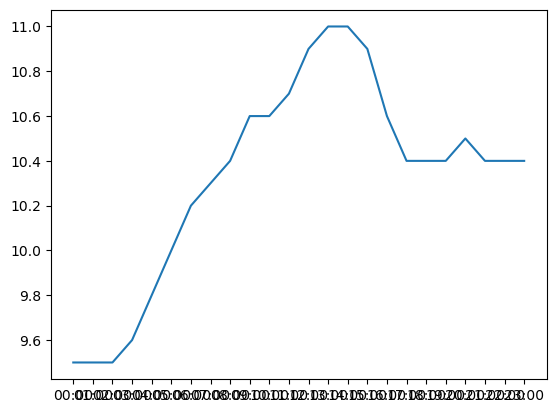

In [5]:
pyplot.plot(df["Time [Local time]"], df["Minimum temperature [°C]"])

Good first look! Let's do the same for the rainfall ("precipitation"). 2 Ways. If we want to see them both at the same time we could add another cell below, and do the same thing as above. Or we change above cell to have "Precipitation [mm]" instead of "Minimum temperature [°C]". 
Try it out :) 

Now this is great to get a first glimpse, but there are multiple issues, which may even prevent a good first look. 
Luckily `pylot` is very flexible and allows customizing our plot to show both datasets in one plot and add some more information to the plot. 

There are many details in the next code block which you do not need to worry about. 

Basically what we do is that we create an empty plot in a certain size, then we add the minimum temperature over time as red line to the plot and add some labels and color also the axis in red. Then we add the rainfall into the same figure as blue bar chart with its own axis in blue. 

In the end we give the plot a title including the name of the station from our dataset and visualize the resulting image. 

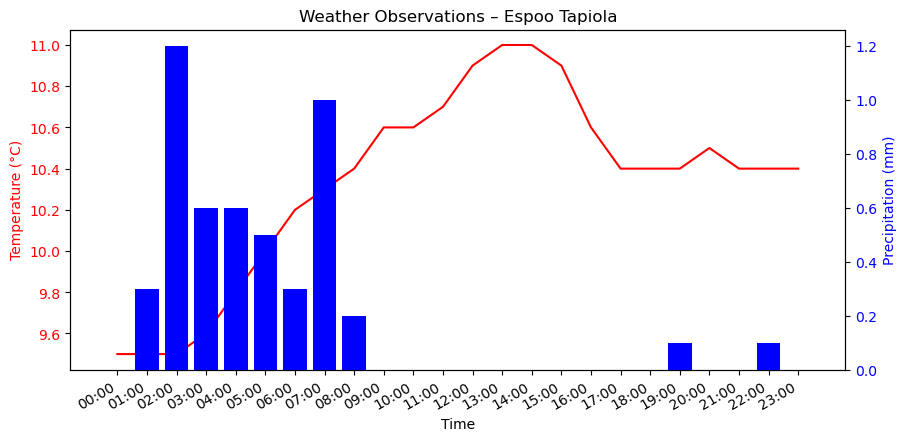

In [ ]:
# create empty plot 
fig, ax1 = pyplot.subplots(figsize=(10, 5))

# Plot temperature
ax1.plot(df["Time [Local time]"], df["Minimum temperature [°C]"], color="red", label="Min Temp (°C)")
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)", color="red")
ax1.tick_params(axis='y', labelcolor="red")

# Plot precipitation on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(df["Time [Local time]"], df["Precipitation [mm]"], color="blue", label="Precipitation (mm)")
ax2.set_ylabel("Precipitation (mm)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Title and formatting
pyplot.title(f"Weather Observations – {df['Observation station'].iloc[0]}")
fig.autofmt_xdate() #makes the time stamps legible
pyplot.show()

Now this is a nice plot that shows us that during night, there was some rain while it was also rather cold, however not below 9 degrees -> Likely no danger of ice on the streets, but still good to be careful. 



What if we do not live in Espoo, but have a longer drive to work from Vihti? 

Let's do the same thing but with a new filename: `Vihti_25Oct25.csv`. 